### Step A: Data preprocessing

#### Step 1: Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Step 2: Import dataset

In [2]:
dataset = pd.read_excel("Customers_ID.xls")

In [3]:
dataset.head()

,CustomerID,Annual Income (in lakh),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


In [4]:
dataset.isnull().sum()

CustomerID                 0
Annual Income (in lakh)    0
Spending Score (1-100)     0
dtype: int64

#### Step 3: To form feature matrix(X)

In [5]:
X = dataset.iloc[:, 1:].values

#### Step 4: Visualise the feature matrix

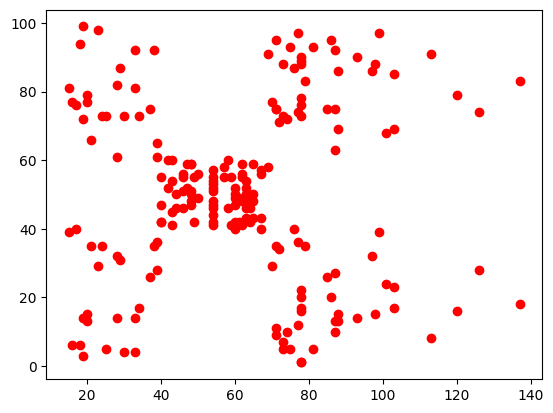

In [6]:
plt.scatter(X[:, 0], X[:, 1], color="red")
plt.show()

## Building Cluster model using Kmeans

In [7]:
from sklearn.cluster import KMeans

In [8]:
KM = KMeans(4)

### Training the model

In [9]:
KM.fit(X)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [10]:
Y_KM = KM.predict(X)

In [11]:
Y_KM

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

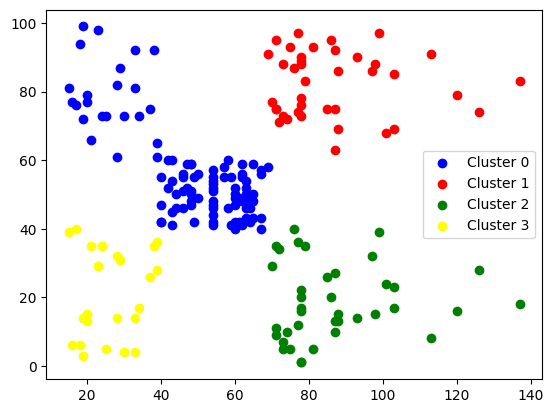

In [12]:
plt.scatter(X[Y_KM == 0, 0], X[Y_KM == 0, 1], color="blue", label="Cluster 0")
plt.scatter(X[Y_KM == 1, 0], X[Y_KM == 1, 1], color="red", label="Cluster 1")
plt.scatter(X[Y_KM == 2, 0], X[Y_KM == 2, 1], color="green", label="Cluster 2")
plt.scatter(X[Y_KM == 3, 0], X[Y_KM == 3, 1], color="yellow", label="Cluster 3")
plt.legend()
plt.show()

#### Choosing the optimal value of K

In [13]:
error_rate = []

for i in range(1, 31):
    KM = KMeans(i)
    KM.fit(X)
    error_rate.append(KM.inertia_)

Text(0, 0.5, 'Inertia')

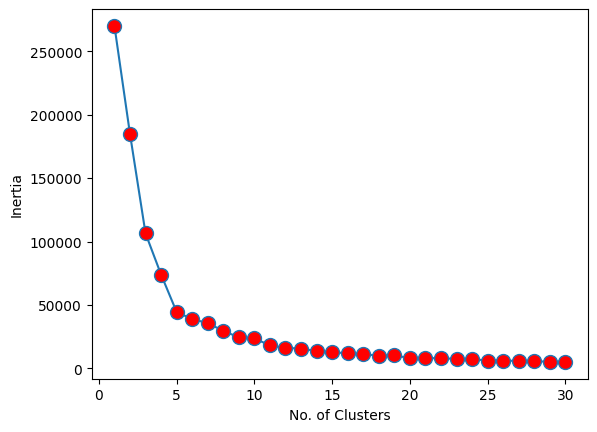

In [14]:
plt.plot(range(1, 31), error_rate, marker="o", markerfacecolor="red", markersize=10)
plt.xlabel("No. of Clusters")
plt.ylabel("Inertia")